# de Sitter spacetime

This worksheet demonstrates a few capabilities of [SageManifolds](http://sagemanifolds.obspm.fr) (version 0.9.1) in computations regarding de Sitter spacetime.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v0.9.1/SM_de_Sitter.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

We also define a viewer for 3D plots (use `'jmol'` for interactive 3D graphics):

In [2]:
viewer3D = 'tachyon' # must be 'jmol', 'tachyon' or None (default)

## Spacetime manifold

We declare the de Sitter spacetime as a 4-dimensional differentiable manifold:

In [3]:
M = Manifold(4, 'M', r'\mathcal{M}')
print(M) ; M

4-dimensional differentiable manifold M


4-dimensional differentiable manifold M

<p>We consider hyperspherical coordinates $(\tau,\chi,\theta,\phi)$ on $\mathcal{M}$. Allowing for the standard coordinate singularities at $\chi=0$, $\chi=\pi$, $\theta=0$ or $\theta=\pi$, these coordinates cover the entire spacetime manifold (which is topologically $\mathbb{R}\times\mathbb{S}^3$). If we restrict ourselves to <em>regular</em> coordinates (i.e. to consider only mathematically well defined charts), the hyperspherical coordinates cover only an open part of $\mathcal{M}$, which we call $\mathcal{M}_0$, on which $\chi$ spans the open interval $(0,\pi)$, $\theta$ the open interval $(0,\pi)$ and $\phi$ the open interval $(0,2\pi)$. Therefore, we declare:</p>

In [4]:
M0 = M.open_subset('M_0', r'\mathcal{M}_0')
X_hyp.<ta,ch,th,ph> = M0.chart(r'ta:\tau ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
print(X_hyp) ; X_hyp

Chart (M_0, (ta, ch, th, ph))


Chart (M_0, (ta, ch, th, ph))

<h2>$\mathbb{R}^5$ as an ambient space</h2>
<p>The de Sitter metric can be defined as that induced by the embedding of $\mathcal{M}$ into a 5-dimensional Minkowski space, i.e. $\mathbb{R}^5$ equipped with a flat Lorentzian metric. We therefore introduce $\mathbb{R}^5$ as a 5-dimensional manifold covered by canonical coordinates:</p>

In [5]:
R5 = Manifold(5, 'R5', r'\mathbb{R}^5')
X5.<T,W,X,Y,Z> = R5.chart()
print(X5) ; X5

Chart (R5, (T, W, X, Y, Z))


Chart (R5, (T, W, X, Y, Z))

The embedding of $\mathcal{M}$ into $\mathbb{R}^5$ is defined as a differential mapping $\Phi$ from $\mathcal{M}$ to $\mathbb{R}^5$, by providing its expression in terms of $\mathcal{M}$'s default chart (which is X_hyp = $(\mathcal{M}_0,(\tau,\chi,\theta,\phi))$ ) and $\mathbb{R}^5$'s default chart (which is X5 = $(\mathbb{R}^5,(T,W,X,Y,Z))$ ):

In [6]:
var('b', domain='real')
Phi = M.diff_map(R5, [sinh(b*ta)/b,
                      cosh(b*ta)/b * cos(ch),
                      cosh(b*ta)/b * sin(ch)*sin(th)*cos(ph),
                      cosh(b*ta)/b * sin(ch)*sin(th)*sin(ph),
                      cosh(b*ta)/b * sin(ch)*cos(th)],
                 name='Phi', latex_name=r'\Phi')
print(Phi) ; Phi.display()

Differentiable map Phi from the 4-dimensional differentiable manifold M to the 5-dimensional differentiable manifold R5


Phi: M --> R5
on M_0: (ta, ch, th, ph) |--> (T, W, X, Y, Z) = (sinh(b*ta)/b, cos(ch)*cosh(b*ta)/b, cos(ph)*cosh(b*ta)*sin(ch)*sin(th)/b, cosh(b*ta)*sin(ch)*sin(ph)*sin(th)/b, cos(th)*cosh(b*ta)*sin(ch)/b)

<p>The constant $b$ is a scale parameter. Considering de Sitter metric as a solution of vacuum Einstein equation with positive cosmological constant $\Lambda$, one has $b = \sqrt{\Lambda/3}$. </p>
<p>Let us evaluate the image of a point via the mapping $\Phi$:</p>

In [7]:
p = M.point((ta, ch, th, ph), name='p') ; print(p)

Point p on the 4-dimensional differentiable manifold M


In [8]:
p.coord()

(ta, ch, th, ph)

In [9]:
q = Phi(p) ; print(q)

Point Phi(p) on the 5-dimensional differentiable manifold R5


In [10]:
q.coord()

(sinh(b*ta)/b,
 cos(ch)*cosh(b*ta)/b,
 cos(ph)*cosh(b*ta)*sin(ch)*sin(th)/b,
 cosh(b*ta)*sin(ch)*sin(ph)*sin(th)/b,
 cos(th)*cosh(b*ta)*sin(ch)/b)

<p>The image of $\mathcal{M}$ by $\Phi$ is a hyperboloid of one sheet, of equation $-T^2+W^2+X^2+Y^2+Z^2=b^{-2}$. Indeed:</p>

In [11]:
(Tq,Wq,Xq,Yq,Zq) = q.coord()
s = -Tq^2 + Wq^2 + Xq^2 + Yq^2 + Zq^2
s.simplify_full()

b^(-2)

<p>We may use the embedding $\Phi$ to draw the coordinate grid $(\tau,\chi)$ in terms of the coordinates $(W,X,T)$ for $\theta=\pi/2$ and $\phi=0$ (red) and $\theta=\pi/2$ and $\phi=\pi$ (green) (the brown lines are the lines $\tau={\rm const}$):</p>

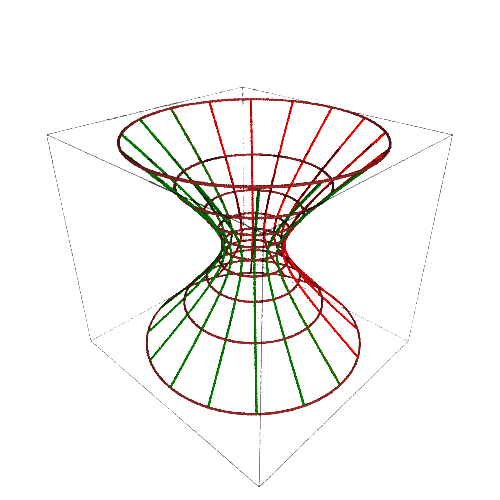

In [12]:
graph1 = X_hyp.plot(X5, mapping=Phi, ambient_coords=(W,X,T), fixed_coords={th:pi/2, ph:0},
                    nb_values=9, color={ta:'red', ch:'brown'}, thickness=2, max_range=2,
                    parameters={b:1}, label_axes=False)
graph2 = X_hyp.plot(X5, mapping=Phi, ambient_coords=(W,X,T), fixed_coords={th:pi/2, ph:pi},
                    nb_values=9, color={ta:'green', ch:'brown'}, thickness=2, max_range=2,
                    parameters={b:1}, label_axes=False)
from sage.manifolds.utilities import set_axes_labels
show(set_axes_labels(graph1+graph2,'W','X','T'), aspect_ratio=1, viewer=viewer3D)

<h2>Spacetime metric</h2>
<p>First, we introduce on $\mathbb{R}^5$ the Minkowski metric $h$:</p>

In [13]:
h = R5.lorentzian_metric('h')
h[0,0], h[1,1], h[2,2], h[3,3], h[4,4] = -1, 1, 1, 1, 1
h.display()

h = -dT*dT + dW*dW + dX*dX + dY*dY + dZ*dZ

<p>As mentionned above, the de Sitter metric $g$ on $\mathcal{M}$ is that induced by $h$, i.e.$g$ is the pullback of $h$ by the mapping $\Phi$:</p>

In [14]:
g = M.metric('g')
g.set( Phi.pullback(h) )

<p>The expression of $g$ in terms of $\mathcal{M}$'s default frame is found to be</p>

In [15]:
g.display()

g = -dta*dta + cosh(b*ta)^2/b^2 dch*dch + cosh(b*ta)^2*sin(ch)^2/b^2 dth*dth + cosh(b*ta)^2*sin(ch)^2*sin(th)^2/b^2 dph*dph

In [16]:
g[:]

[                                  -1                                    0                                    0                                    0]
[                                   0                     cosh(b*ta)^2/b^2                                    0                                    0]
[                                   0                                    0           cosh(b*ta)^2*sin(ch)^2/b^2                                    0]
[                                   0                                    0                                    0 cosh(b*ta)^2*sin(ch)^2*sin(th)^2/b^2]

<h2>Curvature</h2>
<p>The Riemann tensor of $g$ is</p>

In [17]:
Riem = g.riemann()
print(Riem)
Riem.display()

Tensor field Riem(g) of type (1,3) on the 4-dimensional differentiable manifold M


Riem(g) = cosh(b*ta)^2 d/dta*dch*dta*dch - cosh(b*ta)^2 d/dta*dch*dch*dta + cosh(b*ta)^2*sin(ch)^2 d/dta*dth*dta*dth - cosh(b*ta)^2*sin(ch)^2 d/dta*dth*dth*dta + cosh(b*ta)^2*sin(ch)^2*sin(th)^2 d/dta*dph*dta*dph - cosh(b*ta)^2*sin(ch)^2*sin(th)^2 d/dta*dph*dph*dta + b^2 d/dch*dta*dta*dch - b^2 d/dch*dta*dch*dta + cosh(b*ta)^2*sin(ch)^2 d/dch*dth*dch*dth - cosh(b*ta)^2*sin(ch)^2 d/dch*dth*dth*dch + cosh(b*ta)^2*sin(ch)^2*sin(th)^2 d/dch*dph*dch*dph - cosh(b*ta)^2*sin(ch)^2*sin(th)^2 d/dch*dph*dph*dch + b^2 d/dth*dta*dta*dth - b^2 d/dth*dta*dth*dta - (sin(ch)^2*sinh(b*ta)^2 - cos(ch)^2 + 1)/sin(ch)^2 d/dth*dch*dch*dth + cosh(b*ta)^2 d/dth*dch*dth*dch + cosh(b*ta)^2*sin(ch)^2*sin(th)^2 d/dth*dph*dth*dph - cosh(b*ta)^2*sin(ch)^2*sin(th)^2 d/dth*dph*dph*dth + b^2 d/dph*dta*dta*dph - b^2 d/dph*dta*dph*dta - (sin(ch)^2*sinh(b*ta)^2 - cos(ch)^2 + 1)/sin(ch)^2 d/dph*dch*dch*dph + cosh(b*ta)^2 d/dph*dch*dph*dch - cosh(b*ta)^2*sin(ch)^2 d/dph*dth*dth*dph + cosh(b*ta)^2*sin(ch)^2 d/dph*dth*dph*dth

In [18]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^ta_ch,ta,ch = cosh(b*ta)^2 
Riem(g)^ta_th,ta,th = cosh(b*ta)^2*sin(ch)^2 
Riem(g)^ta_ph,ta,ph = cosh(b*ta)^2*sin(ch)^2*sin(th)^2 
Riem(g)^ch_ta,ta,ch = b^2 
Riem(g)^ch_th,ch,th = cosh(b*ta)^2*sin(ch)^2 
Riem(g)^ch_ph,ch,ph = cosh(b*ta)^2*sin(ch)^2*sin(th)^2 
Riem(g)^th_ta,ta,th = b^2 
Riem(g)^th_ch,ch,th = -(sin(ch)^2*sinh(b*ta)^2 - cos(ch)^2 + 1)/sin(ch)^2 
Riem(g)^th_ph,th,ph = cosh(b*ta)^2*sin(ch)^2*sin(th)^2 
Riem(g)^ph_ta,ta,ph = b^2 
Riem(g)^ph_ch,ch,ph = -(sin(ch)^2*sinh(b*ta)^2 - cos(ch)^2 + 1)/sin(ch)^2 
Riem(g)^ph_th,th,ph = -cosh(b*ta)^2*sin(ch)^2

<p>The Ricci tensor:</p>

In [19]:
Ric = g.ricci()
print(Ric)
Ric.display()

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


Ric(g) = -3*b^2 dta*dta + 3*cosh(b*ta)^2 dch*dch + 3*cosh(b*ta)^2*sin(ch)^2 dth*dth + 3*cosh(b*ta)^2*sin(ch)^2*sin(th)^2 dph*dph

In [20]:
Ric[:]

[                            -3*b^2                                  0                                  0                                  0]
[                                 0                     3*cosh(b*ta)^2                                  0                                  0]
[                                 0                                  0           3*cosh(b*ta)^2*sin(ch)^2                                  0]
[                                 0                                  0                                  0 3*cosh(b*ta)^2*sin(ch)^2*sin(th)^2]

<p>The Ricci scalar:</p>

In [21]:
R = g.ricci_scalar()
print(R)
R.display()

Scalar field r(g) on the 4-dimensional differentiable manifold M


r(g): M --> R
on M_0: (ta, ch, th, ph) |--> 12*b^2

We recover the fact that de Sitter spacetime has a constant curvature. It is indeed a **maximally symmetric space**. In particular, the Riemann tensor is expressible as
$$ R^i_{\ \, jlk} = \frac{R}{n(n-1)} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right), $$
where $n$ is the dimension of $\mathcal{M}$: $n=4$ in the present case. Let us check this formula here, under the form $R^i_{\ \, jlk} = -\frac{R}{6} g_{j[k} \delta^i_{\ \, l]}$:

In [22]:
delta = M.tangent_identity_field() 
Riem == - (R/6)*(g*delta).antisymmetrize(2,3)  # 2,3 = last positions of the type-(1,3) tensor g*delta

True

We may also check that de Sitter metric is a solution of the vacuum **Einstein equation** with (positive) cosmological constant:

In [23]:
Lambda = 3*b^2
Ric - 1/2*R*g + Lambda*g == 0

True